# 판매분석

In [ ]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [ ]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import db_util as dm

## 1. 월별 매출/이익

In [ ]:
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,14048100,906380
02,10704100,871450
03,6925600,633310
04,12578100,967600
05,18755800,1908970
06,13945100,1253430
07,10102900,717540
08,15981200,1214090
09,10241600,726920


In [ ]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]

In [ ]:
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,14048100,10704100,6925600,12578100,18755800,13945100,10102900,15981200,10241600,11674900,6727800,15179700,146864900
이익,906380,871450,633310,967600,1908970,1253430,717540,1214090,726920,1070730,730330,1224260,12225010


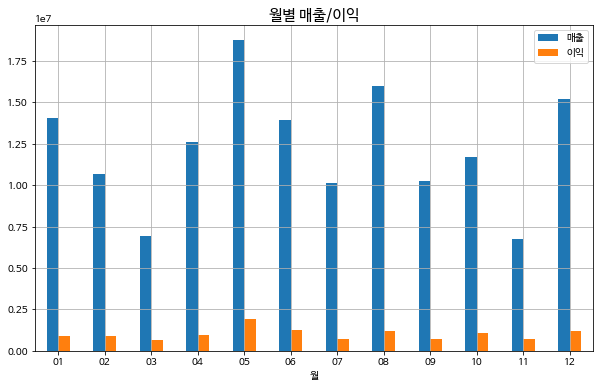

In [ ]:
df.plot.bar(figsize=(10,6), rot=0)
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

## 2. 거래처별 매출/이익

In [ ]:
pd.options.display.float_format = '{:.2}'.format

In [ ]:
results = dm.get_correspondent_revenue(config)
df = pd.DataFrame(results, columns=['거래처','매출','이익'])
df.set_index('거래처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익률'] = df.이익 / df.매출 * 100
df.sort_values(by='매출', ascending=False)

,매출,이익,이익률
거래처,,,
인터파크,37776400,3319580,8.8
옥션,32046400,2615930,8.2
티몬,26267700,2210690,8.4
11번가,26071000,1973720,7.6
쿠팡,24703400,2105090,8.5


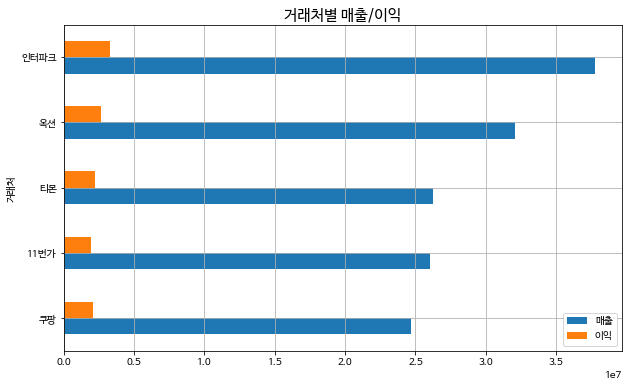

In [ ]:
df[['매출', '이익']].plot.barh(figsize=(10,6))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

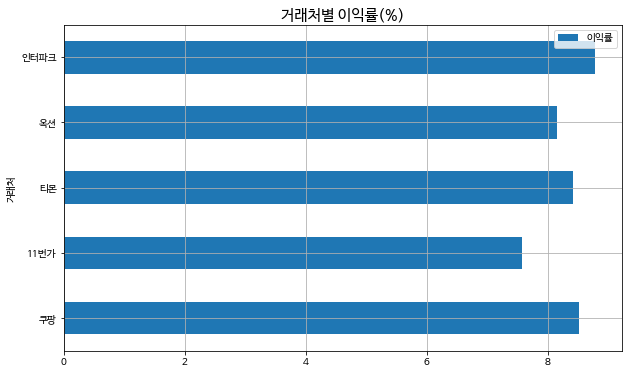

In [ ]:
df[['이익률']].plot.barh(figsize=(10,6))
plt.title('거래처별 이익률(%)', size=15)
plt.grid()
plt.show()

## 3. 거래처별 판매제품 및 수량

In [ ]:
company = input('거래처명> ')
results = dm.get_correspondent_sales(config, company)
df = pd.DataFrame(results, columns=['판매제품', '수량'])
df.set_index('판매제품', inplace=True)
df['수량'] = df.수량.astype(int)
df.head()

거래처명> 11번가


,수량
판매제품,
세탁기,27
맨투맨,15
책장,25
토트백,5
옷장,2


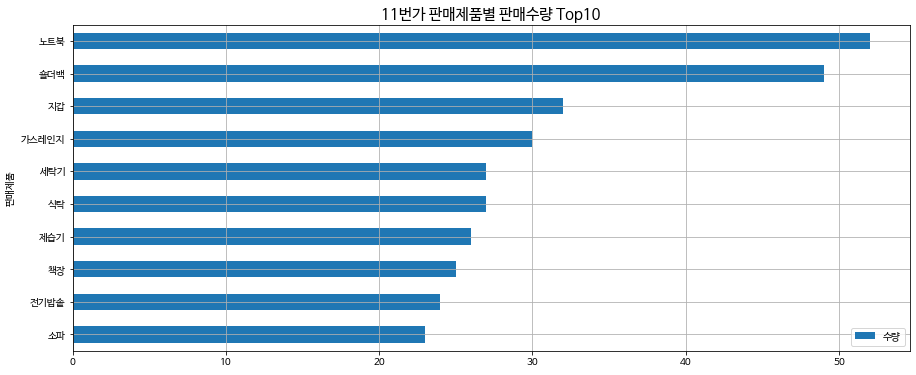

In [ ]:
df.sort_values(by='수량').tail(10).plot.barh(figsize=(15,6))
plt.title(f'{company} 판매제품별 판매수량 Top10', size=15)
plt.grid()
plt.show()

- 강사님 풀이(3. 거래처별 판매제품 및 수량)

In [ ]:
results = dm.get_correspondent_sales2(config)
df = pd.DataFrame(results, columns=['거래처', '판매제품', '수량'])
df.set_index(['거래처', '판매제품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

수량
거래처  판매제품     
11번가 가스레인지  30
     노트북    52
     니트     21
     맨투맨    15
     바지     14
...         ..
티몬   지갑     27
     책상     21
     책장      3
     클러치백   25
     탁자     33

[114 rows x 1 columns]

In [ ]:
df.reset_index()['거래처'].unique()

array(['11번가', '옥션', '인터파크', '쿠팡', '티몬'], dtype=object)

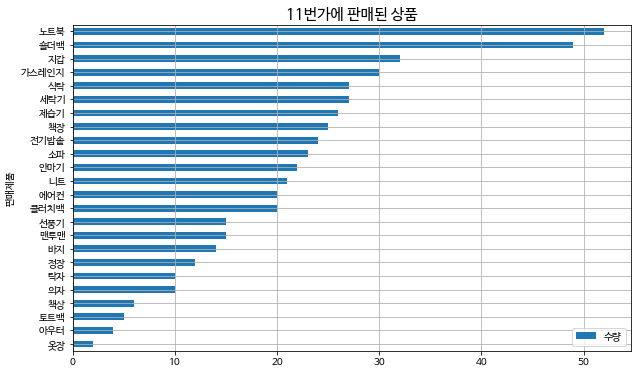

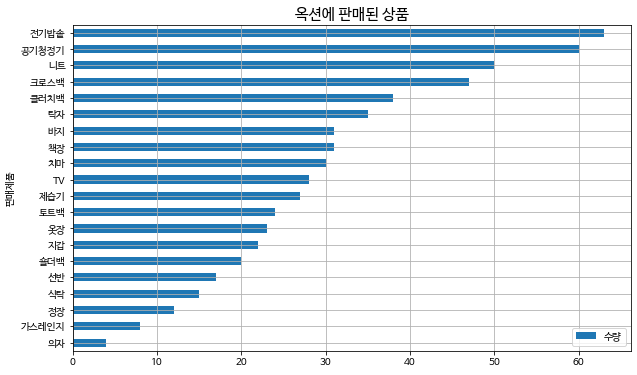

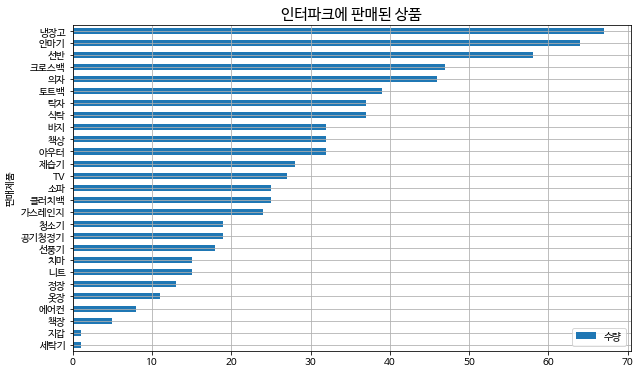

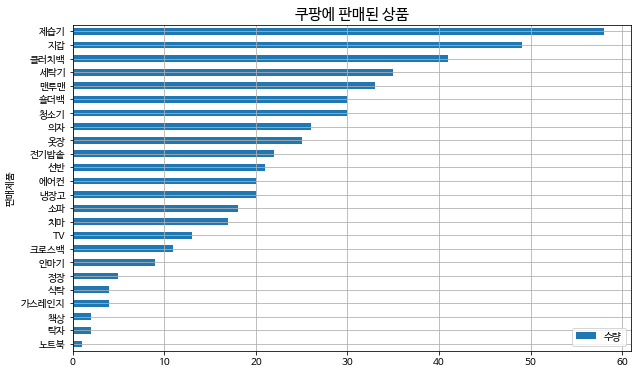

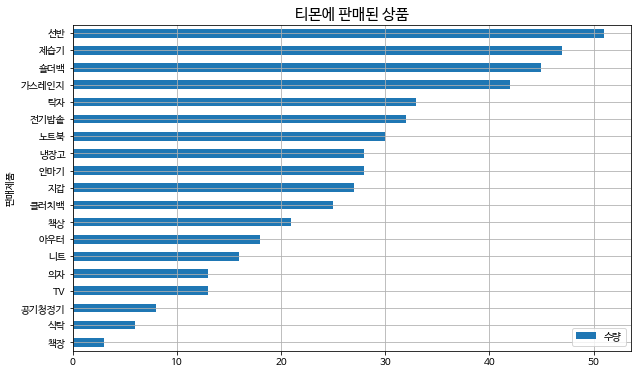

In [ ]:
for company in df.reset_index()['거래처'].unique():
    sdf = df.loc[company]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

## 4. 제품별 판매수량/매출/이익

In [ ]:
results = dm.get_product_sales(config)
df = pd.DataFrame(results, columns=['제품', '판매수량', '매출', '이익'])
df.set_index('제품', inplace=True)
df['판매수량'] = df.판매수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df.head()

,판매수량,매출,이익
제품,,,
맨투맨,48,4588800,412800
니트,102,9975600,498780
치마,62,4073400,448260
바지,77,2718100,135520
지갑,131,1768500,141480


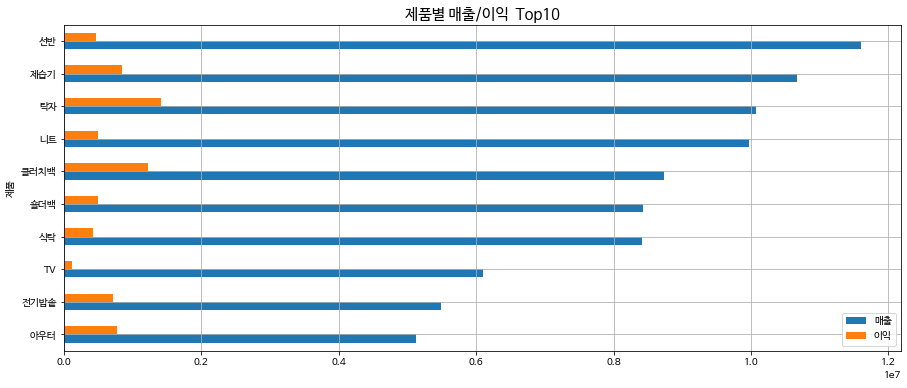

In [ ]:
df[['매출', '이익']].sort_values(by='매출').tail(10).plot.barh(figsize=(15,6))
plt.title('제품별 매출/이익  Top10', size=15)
plt.grid()
plt.show()

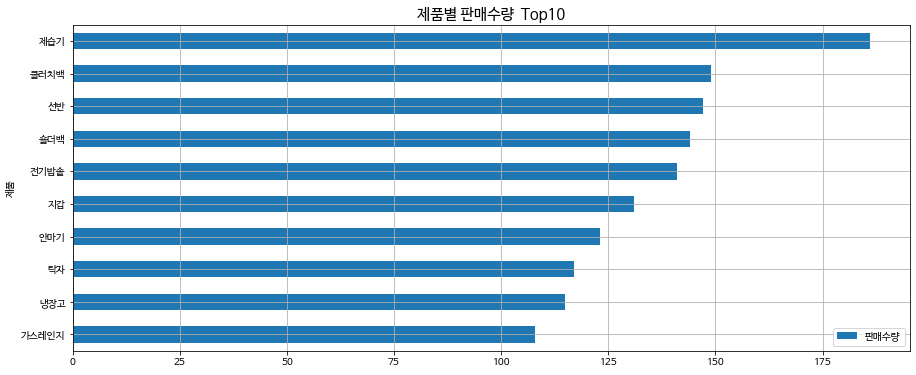

In [ ]:
df[['판매수량']].sort_values(by='판매수량').tail(10).plot.barh(figsize=(15,6))
plt.title('제품별 판매수량  Top10', size=15)
plt.grid()
plt.show()

## 5. 카테고리별 매출/이익

In [ ]:
results = dm.get_category_sales(config)
df = pd.DataFrame(results, columns=['카테고리', '매출', '이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익률'] = df.이익 / df.매출 * 100
df

,매출,이익,이익률
카테고리,,,
의류/가방/잡화,51587400,4824420,9.4
가구,46132400,3867950,8.4
가전제품,49145100,3532640,7.2


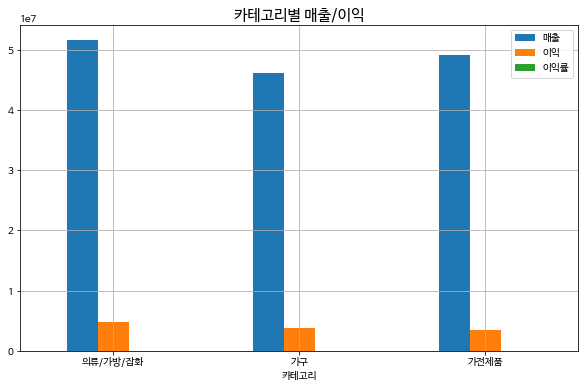

In [ ]:
df.plot.bar(figsize=(10,6), rot=0)
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
plt.show()

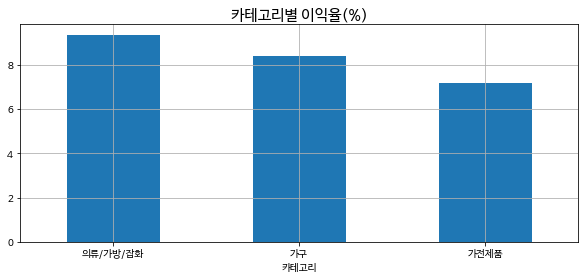

In [ ]:
df['이익률'].plot.bar(figsize=(10,4), rot=0)
plt.title('카테고리별 이익율(%)', size=15)
plt.grid()
plt.show()